## Importation

In [1]:
import pandas as pd
import numpy as np
import os

data_path = "./../data"
dataset_name = "train.csv"

dataset = os.path.join(data_path, dataset_name)

import_col = ['Id', 'MSZoning' , 'LotArea', 'Neighborhood',  'OverallQual', 
              'OverallCond','TotalBsmtSF','CentralAir','1stFlrSF', 
              '2ndFlrSF', 'KitchenQual','TotRmsAbvGrd','Fireplaces',
              'GarageArea', 'PoolArea','MiscFeature','MiscVal', 'MoSold', 
              'YrSold', 'SaleType','SaleCondition', 'SalePrice']


df_all = pd.read_csv(dataset, usecols= import_col, index_col='Id')

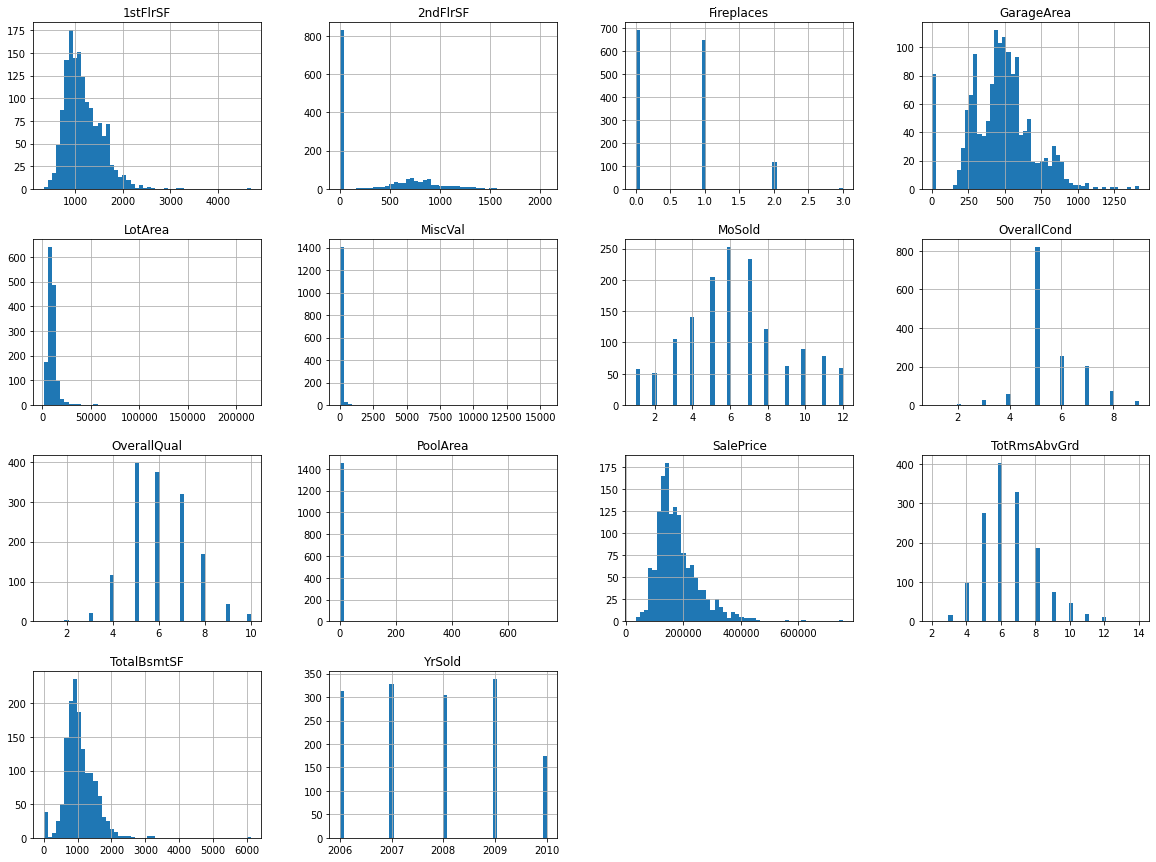

In [2]:
# visualise numerical data.
import matplotlib.pyplot as plt
df_all.hist(bins = 50, figsize=(20,15))
plt.show()


In [3]:
# Check for Nan.
df_all.isnull().sum()

MSZoning            0
LotArea             0
Neighborhood        0
OverallQual         0
OverallCond         0
TotalBsmtSF         0
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
KitchenQual         0
TotRmsAbvGrd        0
Fireplaces          0
GarageArea          0
PoolArea            0
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

## Split into test and train

In [4]:
# Split df into train and test DataFrames
from sklearn.model_selection import train_test_split

df_train, df_test, y_train,y_test = train_test_split(df_all, df_all.SalePrice, test_size=0.2, random_state=42)

## Features

In [5]:
# Qualitative data :

# MSZoning: Identifies the general zoning classification of the sale.
# Neighborhood: Physical locations within Ames city limits
# MiscFeature: Miscellaneous feature not covered in other categories
# SaleType: Type of sale
# SaleCondition: Condition of sale  
# MoSold: Month Sold (MM)
# YrSold: Year Sold (YYYY)

qual_col = ['MSZoning', 'Neighborhood', 'MiscFeature','SaleType', 
            'SaleCondition' , 'MoSold', 'YrSold',]

# Quantitative data : 

# LotArea: Lot size in square feet              
# OverallQual: Rates the overall material and finish of the house
# OverallCond: Rates the overall condition of the house
# TotalBsmtSF: Total square feet of basement area
# CentralAir: Central air conditioning
# 1stFlrSF: First Floor square feet
# 2ndFlrSF: Second floor square feet
# KitchenQual: Kitchen quality
# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
# Fireplaces: Number of fireplaces
# GarageArea: Size of garage in square feet
# PoolArea: Pool area in square feet
# MiscVal: $Value of miscellaneous feature

quant_col = ['LotArea', 'OverallQual', 'OverallCond','TotalBsmtSF',
             'CentralAir','1stFlrSF', '2ndFlrSF', 'KitchenQual', 
             'TotRmsAbvGrd','Fireplaces','GarageArea', 'PoolArea','MiscVal']

# To estimate :

# SalePrice: price of sale

to_predict_col = ['SalePrice']


In [6]:
features_col = quant_col + to_predict_col
df_quant = df_train[features_col]    

## Correlation

In [7]:
corr_matrix = df_quant.corr()
corr_matrix

,LotArea,OverallQual,OverallCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,TotRmsAbvGrd,Fireplaces,GarageArea,PoolArea,MiscVal,SalePrice
LotArea,1.000000,0.102088,0.001625,0.262559,0.298230,0.054405,0.186956,0.271525,0.179124,0.086463,0.038358,0.266204
OverallQual,0.102088,1.000000,-0.087599,0.529557,0.463751,0.288717,0.416332,0.384819,0.550476,0.079182,-0.032040,0.785555
OverallCond,0.001625,-0.087599,1.000000,-0.171633,-0.133805,0.040216,-0.042000,-0.004995,-0.139431,-0.007496,0.077016,-0.074391
TotalBsmtSF,0.262559,0.529557,-0.171633,1.000000,0.827382,-0.185489,0.269915,0.329822,0.490728,0.149610,-0.019287,0.597766
1stFlrSF,0.298230,0.463751,-0.133805,0.827382,1.000000,-0.213277,0.389285,0.404924,0.489108,0.158722,-0.022282,0.587883
2ndFlrSF,0.054405,0.288717,0.040216,-0.185489,-0.213277,1.000000,0.622290,0.194718,0.143985,0.106086,0.021329,0.314030
TotRmsAbvGrd,0.186956,0.416332,-0.042000,0.269915,0.389285,0.622290,1.000000,0.319408,0.335434,0.103237,0.030123,0.520388
Fireplaces,0.271525,0.384819,-0.004995,0.329822,0.404924,0.194718,0.319408,1.000000,0.256000,0.106907,0.004239,0.457549
GarageArea,0.179124,0.550476,-0.139431,0.490728,0.489108,0.143985,0.335434,0.256000,1.000000,0.079918,-0.032842,0.624139
PoolArea,0.086463,0.079182,-0.007496,0.149610,0.158722,0.106086,0.103237,0.106907,0.079918,1.000000,0.032032,0.115630


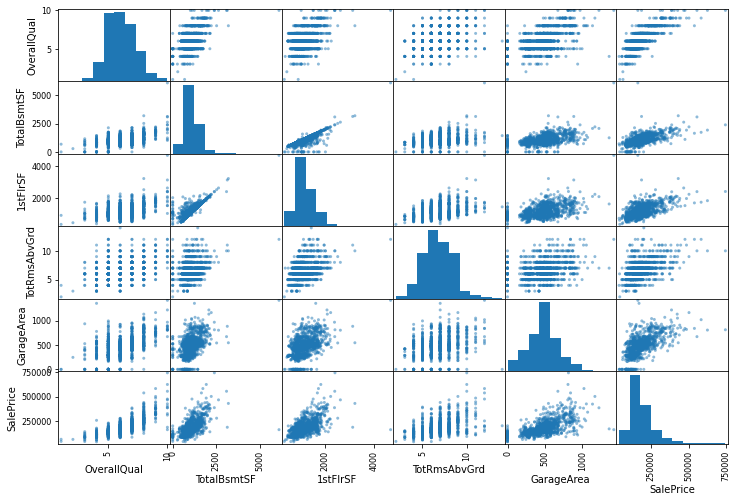

In [8]:
# Scatter matrix for feature well correlated with the price.
from pandas.plotting import scatter_matrix

t = 0.5
to_visualize = [c for c in corr_matrix.columns if corr_matrix[c]['SalePrice'] > t]

scatter_matrix(df_quant[to_visualize], figsize = (12,8))
plt.show()

The prices over 50000 is being removed since it is rare and not following the general slope.

In [9]:
price_ceiling = 500000
#price_ceiling = 600000
id_high_price = [i for i in df_train.index if df_train["SalePrice"][i] > price_ceiling]
df_train = df_train.drop(id_high_price , axis = 0)
y_train = y_train.drop(id_high_price , axis = 0)


## Feature ingineering

In [10]:
# Transform the square feet of the second floor into existence of a second floor.
# Could add criminality data to the dataset.
# Split garage area into two feature : existence of a garage and the area (normalised), is this perform better ?
# Transform the miscVal into the existence of the value or not.

## Preprocessing

In [11]:
quant_col = ['LotArea', 'OverallQual', 'OverallCond','TotalBsmtSF',
             'CentralAir','1stFlrSF', '2ndFlrSF', 'KitchenQual', 
             'TotRmsAbvGrd','Fireplaces','GarageArea', 'PoolArea','MiscVal']


feature_to_encod = ["MSZoning", "Neighborhood", "SaleCondition", "MiscFeature"]
feature_to_encod = ["MSZoning", "SaleCondition"]
#feature_to_encod = ["SaleCondition"]

features = quant_col + feature_to_encod

df_train_unprepared = df_train[features]
df_test_unprepared = df_test[features]

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer 
from preprocessing import OneHotEncodTransformer

from preprocessing import ReplaceTransformer


D = {"CentralAir" : {'Y' : 1, 'N' : 0},
     "KitchenQual" : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa': 2, 'Po': 1}
     }

preprocess_pipeline = Pipeline([('replacer', ReplaceTransformer(D)),
                                ('one_hot_encoder', 
                                 OneHotEncodTransformer(feature_to_encod)),
                                ('imputer', SimpleImputer(strategy='median')),
                                ('std_scaler', StandardScaler()),
                     ])

preprocess_pipeline.fit(df_train_unprepared)


X_train = preprocess_pipeline.transform(df_train_unprepared)
X_test = preprocess_pipeline.transform(df_test_unprepared)

## Linear model

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

reg = LinearRegression()

scores = cross_val_score(reg, X_train, y_train, cv=10, scoring = "neg_root_mean_squared_error")
print("scores : ", scores)
print("mean score : ", scores.mean())

scores :  [-29278.52576763 -30975.17201132 -33012.94332714 -44685.84184044
 -55102.48604594 -34479.11652799 -30587.28297948 -29751.18652344
 -42586.34170555 -25807.36304649]
mean score :  -35626.62597754369


In [13]:
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(X_train, y_train)
y_predict_train = reg.predict(X_train)

RMSE = np.sqrt(mean_squared_error(y_predict_train, y_train.values))
print(RMSE)

33010.89861407939


In [14]:
# Check if the linear model perform well on the test set. 
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(X_train, y_train)
y_predict = reg.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_predict, y_test.values))
print(RMSE)

39583.76774357586


Let study the difference between the predicted prices and the real price on the train set. Let's study the correlation between the overestimation of the price and other features.

In [15]:
# Add a overprice column to the dataframe. 
overprice = y_predict_train - y_train
overprice.name = "Overprice"
df_overprice = pd.concat([df_train_unprepared, overprice, y_train], axis = 1)

df_overprice.corr()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,TotRmsAbvGrd,Fireplaces,GarageArea,PoolArea,MiscVal,Overprice,SalePrice
LotArea,1.000000e+00,9.001697e-02,5.349856e-03,2.567163e-01,2.930234e-01,3.795025e-02,1.723711e-01,2.699663e-01,1.701837e-01,8.944700e-02,3.938420e-02,4.408713e-17,0.252615
OverallQual,9.001697e-02,1.000000e+00,-8.254683e-02,5.147675e-01,4.481844e-01,2.768997e-01,4.006083e-01,3.774753e-01,5.420909e-01,5.235770e-02,-3.139004e-02,-1.503604e-16,0.792755
OverallCond,5.349856e-03,-8.254683e-02,1.000000e+00,-1.682517e-01,-1.296907e-01,4.553809e-02,-3.604121e-02,-2.003658e-03,-1.358014e-01,-1.817576e-03,7.682074e-02,2.681460e-16,-0.065183
TotalBsmtSF,2.567163e-01,5.147675e-01,-1.682517e-01,1.000000e+00,8.221745e-01,-2.091801e-01,2.496502e-01,3.196675e-01,4.823188e-01,1.281885e-01,-1.844584e-02,-2.338582e-16,0.584790
1stFlrSF,2.930234e-01,4.481844e-01,-1.296907e-01,8.221745e-01,1.000000e+00,-2.376203e-01,3.745712e-01,3.972243e-01,4.794541e-01,1.352511e-01,-2.151716e-02,-1.155321e-16,0.577632
2ndFlrSF,3.795025e-02,2.768997e-01,4.553809e-02,-2.091801e-01,-2.376203e-01,1.000000e+00,6.190110e-01,1.894170e-01,1.328488e-01,6.852458e-02,2.250310e-02,-1.096082e-16,0.287815
TotRmsAbvGrd,1.723711e-01,4.006083e-01,-3.604121e-02,2.496502e-01,3.745712e-01,6.190110e-01,1.000000e+00,3.129077e-01,3.201658e-01,8.799515e-02,3.181763e-02,-3.592395e-16,0.500939
Fireplaces,2.699663e-01,3.774753e-01,-2.003658e-03,3.196675e-01,3.972243e-01,1.894170e-01,3.129077e-01,1.000000e+00,2.506458e-01,9.024558e-02,4.792449e-03,-1.511992e-16,0.463440
GarageArea,1.701837e-01,5.420909e-01,-1.358014e-01,4.823188e-01,4.794541e-01,1.328488e-01,3.201658e-01,2.506458e-01,1.000000e+00,6.837696e-02,-3.227723e-02,-2.112716e-16,0.628272
PoolArea,8.944700e-02,5.235770e-02,-1.817576e-03,1.281885e-01,1.352511e-01,6.852458e-02,8.799515e-02,9.024558e-02,6.837696e-02,1.000000e+00,3.587666e-02,5.098782e-16,0.040002


The correlation between overprice and other features than the price is almost zero, i.e. that the linear model did his job to uses linear relations between those features and the price.

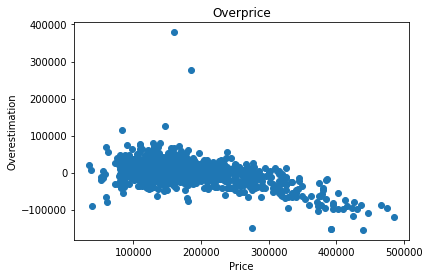

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_train, overprice)

ax.set(xlabel='Price', ylabel='Overestimation',
       title='Overprice')

plt.show()

The higher the price is the more the model underestimate the price. This suggest that a linear model could be unadapted. Since the performance on the test set is better than on the train set we know that the linear regression does not overfit. We will try polynomial regression as a more complex model.

## Polynomial Regression

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)


model = LinearRegression()
#model.fit(X_train, y_train)

scores = cross_val_score(model, X_train_poly, y_train, cv=10, scoring = "neg_root_mean_squared_error")
print(scores, scores.mean())


[-3.43161472e+16 -2.48758971e+04 -2.82859291e+04 -5.97311519e+04
 -3.31024571e+04 -3.24878402e+04 -6.59547606e+04 -2.63626294e+04
 -5.08493271e+15 -2.60270090e+04] -3940107995426137.0


In [18]:
# Still bad, but learned, need more values !
from sklearn.metrics import mean_squared_error 
model = LinearRegression()
model.fit(X_train_poly, y_train)

y_predict = model.predict(X_test_poly)

RMSE = np.sqrt(mean_squared_error(y_predict, y_test.values))
print("RMSE on test : ", RMSE)


y_predict_train = model.predict(X_train_poly)
RMSE = np.sqrt(mean_squared_error(y_predict_train, y_train.values))
print("RMSE on train : ", RMSE)

RMSE on test :  34100.63163617962
RMSE on train :  23515.890395539


At the degre 2 the result of the prediction is better than with the linear regression. Nevertheless, since the score is much better on train than on the test we can conclude that the model overftit. We should introduce more regulation to reduce variance and improve the model. (Here we don't have more data to deal with the overfit.)

<font color='green'> Try more regulation on the polynomial model ! </font>

## Random forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
params = {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}

RF_reg = RandomForestRegressor(**params)

scores = cross_val_score(RF_reg, X_train, y_train, cv=10, scoring = "neg_root_mean_squared_error")
print("scores : ", scores)
print("mean score : ", scores.mean())

scores :  [-27183.29702637 -29807.45508551 -29501.35039684 -41110.08015261
 -33692.40502999 -36549.54591674 -32982.88799615 -32030.13959352
 -32145.7928693  -24104.72260286]
mean score :  -31910.7676669886


In [20]:
# The model slighly ovefit since train is better than test. No much.
from sklearn.metrics import mean_squared_error 
RF_reg = RandomForestRegressor(**params)
RF_reg.fit(X_train, y_train)

y_predict = RF_reg.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_predict, y_test.values))
print("RMSE on test : ", RMSE)

y_predict_train = RF_reg.predict(X_train)
RMSE = np.sqrt(mean_squared_error(y_predict_train, y_train.values))
print("RMSE on train : ", RMSE)

RMSE on test :  39942.12054844549
RMSE on train :  25238.536838330117


In [21]:
# can take few minutes on my computer.
from sklearn.model_selection import GridSearchCV

GRID_SEARCH = False

model = RandomForestRegressor()

param_grid = {
        'n_estimators' : [3,10,30,100], 
        'max_depth' : [2,3,4,5],
        'min_samples_split' : [2,5,10,20]  
  }

if GRID_SEARCH:
    
    grid_search = GridSearchCV(model, param_grid)
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)

example of result : {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}

## Gradient boosting

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(**params, learning_rate = 0.4)
gbrt.fit(X_train, y_train)

y_predict = gbrt.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_predict, y_test.values))
print("RMSE on test : ", RMSE)

y_predict_train = RF_reg.predict(X_train)
RMSE = np.sqrt(mean_squared_error(y_predict_train, y_train.values))
print("RMSE on train : ", RMSE)

RMSE on test :  39973.28745507832
RMSE on train :  25238.536838330117


## Testing on Kaggle

In [23]:
# Import validation dataset
data_path = "./../data"
dataset_name = "test.csv"

dataset = os.path.join(data_path, dataset_name)

import_col = ['Id', 'MSZoning' , 'LotArea', 'Neighborhood',  'OverallQual', 
              'OverallCond','TotalBsmtSF','CentralAir','1stFlrSF', 
              '2ndFlrSF', 'KitchenQual','TotRmsAbvGrd','Fireplaces',
              'GarageArea', 'PoolArea','MiscFeature','MiscVal', 'MoSold', 
              'YrSold', 'SaleType','SaleCondition']


df_val = pd.read_csv(dataset, usecols= import_col, index_col='Id')

# keep indices for the submission
indices = df_val.index

# Prepare validation set
df_val_unprepared = df_val[features]
#preprocess_pipeline.fit(df_train_unprepared)
X_val = preprocess_pipeline.transform(df_val_unprepared)

# Apply model
#model = RandomForestRegressor(**params)
model = GradientBoostingRegressor(**params, learning_rate = 0.4)
model.fit(X_train, y_train)
y_val = model.predict(X_val)

# Create submission file 
df_submission = pd.DataFrame(y_val, columns = ["SalePrice"], index = indices)
submission_name = "gradient_boosting_regressor.csv"

data_path = "./../data"
dataset_name = "test.csv"
submission_file = os.path.join(data_path, submission_name)

df_submission.to_csv(submission_file)